In [39]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

In [4]:
#importing the dataset
dataset = pd.read_csv("C:\\Users\\narayanreddy\\Desktop\\python\\My Projects\\Kaggle credit card default payments\\UCI_Credit_Card.csv")

In [5]:
#Renaming the dependent variable as default
dataset = dataset.rename(columns = {'default.payment.next.month':'default'})

In [6]:
print(dataset.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')


In [7]:
#checking for missing values in the dataset
print(dataset.isnull().sum())

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


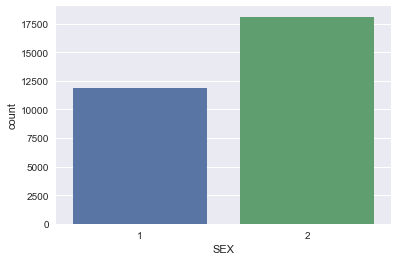

In [8]:
#Exploratory Analysis
sns.countplot(x='SEX', data = dataset)

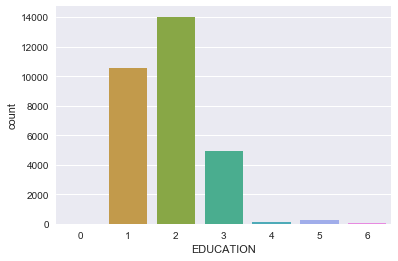

In [9]:
sns.countplot(x='EDUCATION', data = dataset)

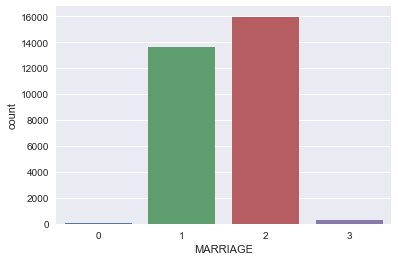

In [10]:
sns.countplot(x='MARRIAGE', data = dataset)

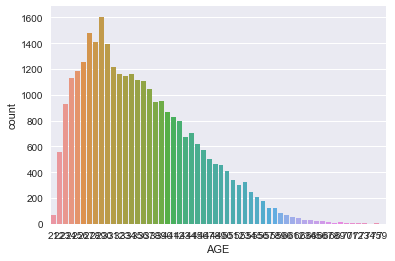

In [11]:
sns.countplot(x='AGE', data = dataset)

In [12]:
dataset.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [13]:
dataset.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [14]:
dataset.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [15]:
dataset.groupby('AGE')['AGE'].count()

AGE
21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64

In [16]:
#Marriage, merging 0 to 3
dataset['MARRIAGE'] = dataset['MARRIAGE'].map({0:3, 1:1, 2:2, 3:3})
MARRIAGE_count= dataset.groupby('MARRIAGE').MARRIAGE.count()
print(MARRIAGE_count)

MARRIAGE
1    13659
2    15964
3      377
Name: MARRIAGE, dtype: int64


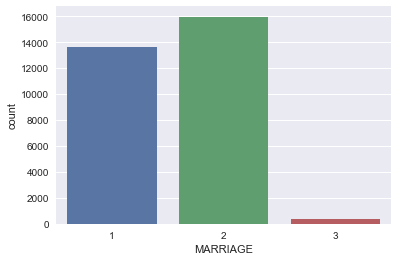

In [17]:
sns.countplot(x='MARRIAGE', data = dataset)

In [18]:
#Education is ordinal: merging 0,5,6 to 4
dataset['EDUCATION'] = dataset['EDUCATION'].map({0:4, 1:1, 2:2, 3:3, 4:4, 
    5:4, 6: 4})
EDUCATION_count= dataset.groupby('EDUCATION').EDUCATION.count()
print(EDUCATION_count)

EDUCATION
1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64


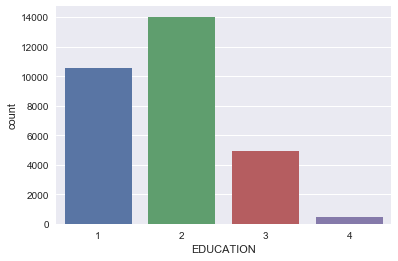

In [19]:
sns.countplot(x='EDUCATION', data = dataset)

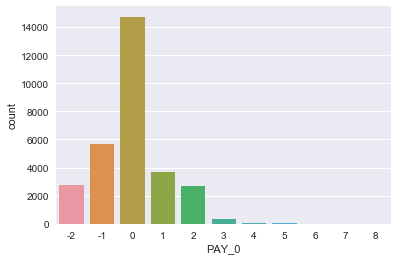

In [20]:
#Repayments: -1: pay duly; 1: payment delayed by 1 month; 2: payment delayed by 2 months and so....

sns.countplot(x='PAY_0', data = dataset)

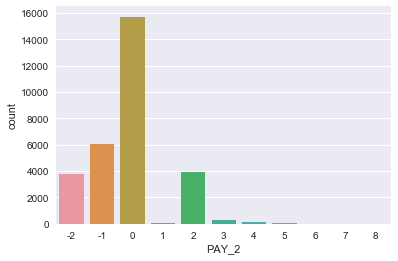

In [22]:
sns.countplot(x='PAY_2', data = dataset)

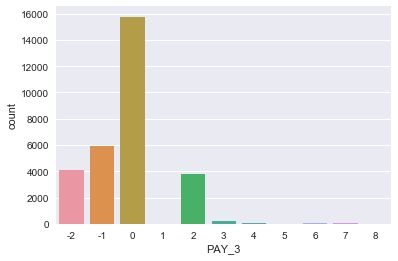

In [23]:
sns.countplot(x='PAY_3', data = dataset)

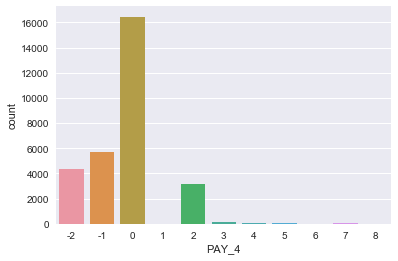

In [24]:
sns.countplot(x='PAY_4', data = dataset)

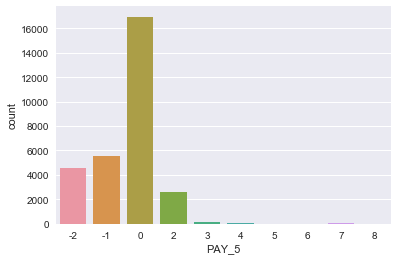

In [25]:
sns.countplot(x='PAY_5', data = dataset)

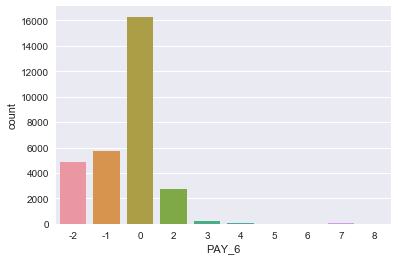

In [27]:
sns.countplot(x='PAY_6', data = dataset)

In [28]:
#-1,-2 & 0 indicates same regards with repayment status and hence we can merge all of them to 0
dataset["PAY_0"] = dataset["PAY_0"].map({-1:0,-2:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
dataset["PAY_2"] = dataset["PAY_2"].map({-1:0,-2:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
dataset["PAY_3"] = dataset["PAY_3"].map({-1:0,-2:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
dataset["PAY_4"] = dataset["PAY_4"].map({-1:0,-2:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
dataset["PAY_5"] = dataset["PAY_5"].map({-1:0,-2:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
dataset["PAY_6"] = dataset["PAY_6"].map({-1:0,-2:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})

In [29]:
#check for default payments for next month
default_count= dataset.groupby('default').default.count()
print(default_count)

default
0    23364
1     6636
Name: default, dtype: int64


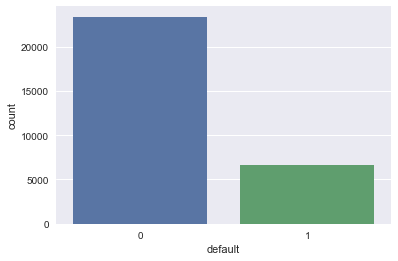

In [30]:
sns.countplot(x='default', data = dataset)

In [31]:
#Gender affecting the default payment
pd.crosstab(dataset['default'],dataset['SEX'])

SEX,1,2
default,,
0,9015,14349
1,2873,3763


In [32]:
#Education affecting the default payment
pd.crosstab(dataset['default'],dataset['EDUCATION'])

EDUCATION,1,2,3,4
default,,,,
0,8549,10700,3680,435
1,2036,3330,1237,33


In [33]:
#Marital status affecting the default payment
pd.crosstab(dataset['default'],dataset['MARRIAGE'])

MARRIAGE,1,2,3
default,,,
0,10453,12623,288
1,3206,3341,89


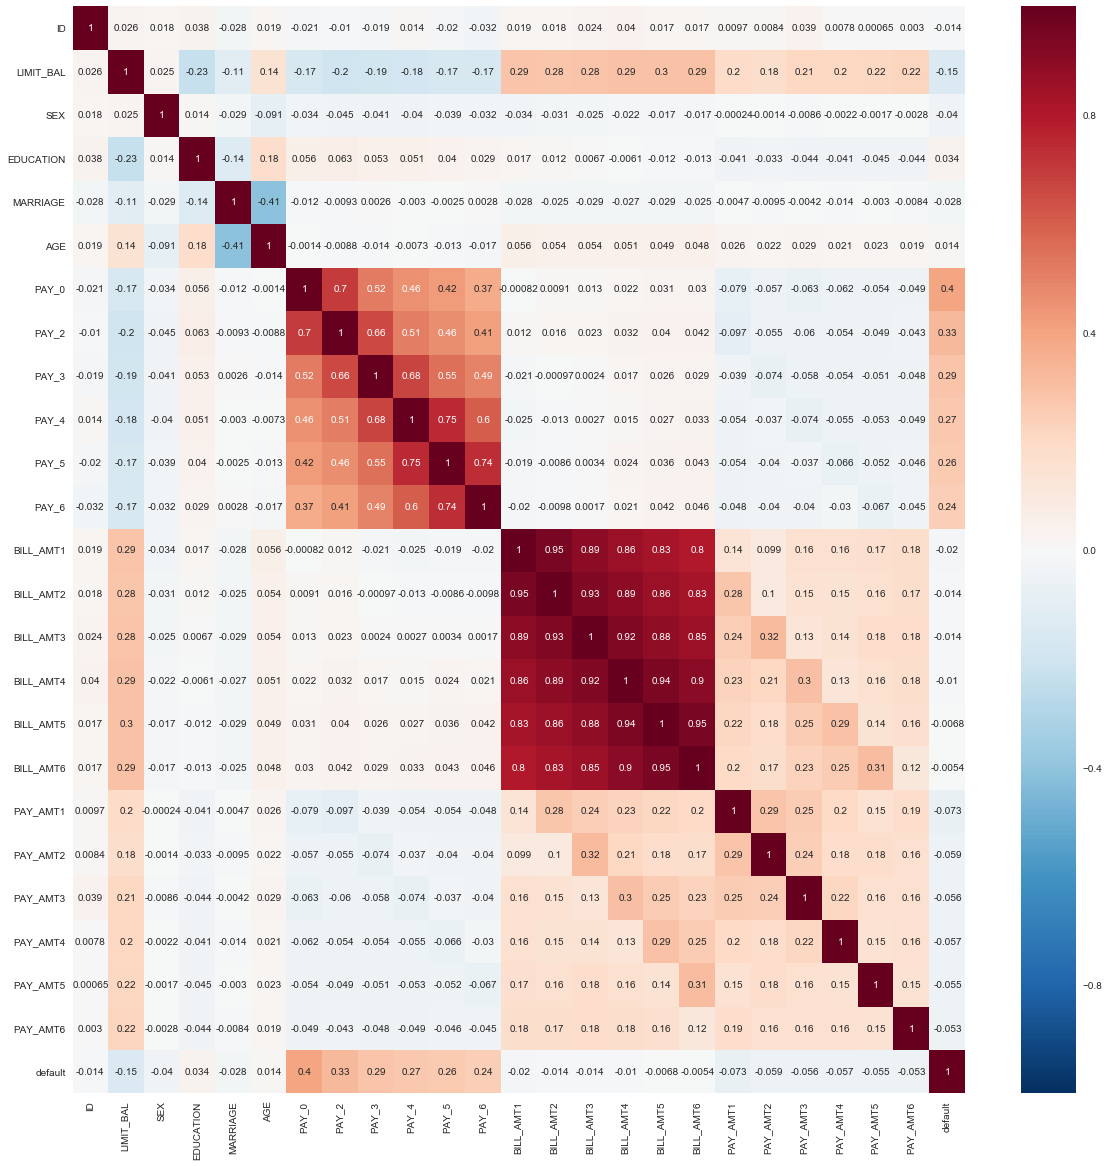

In [34]:
#correlation plot
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot =True)

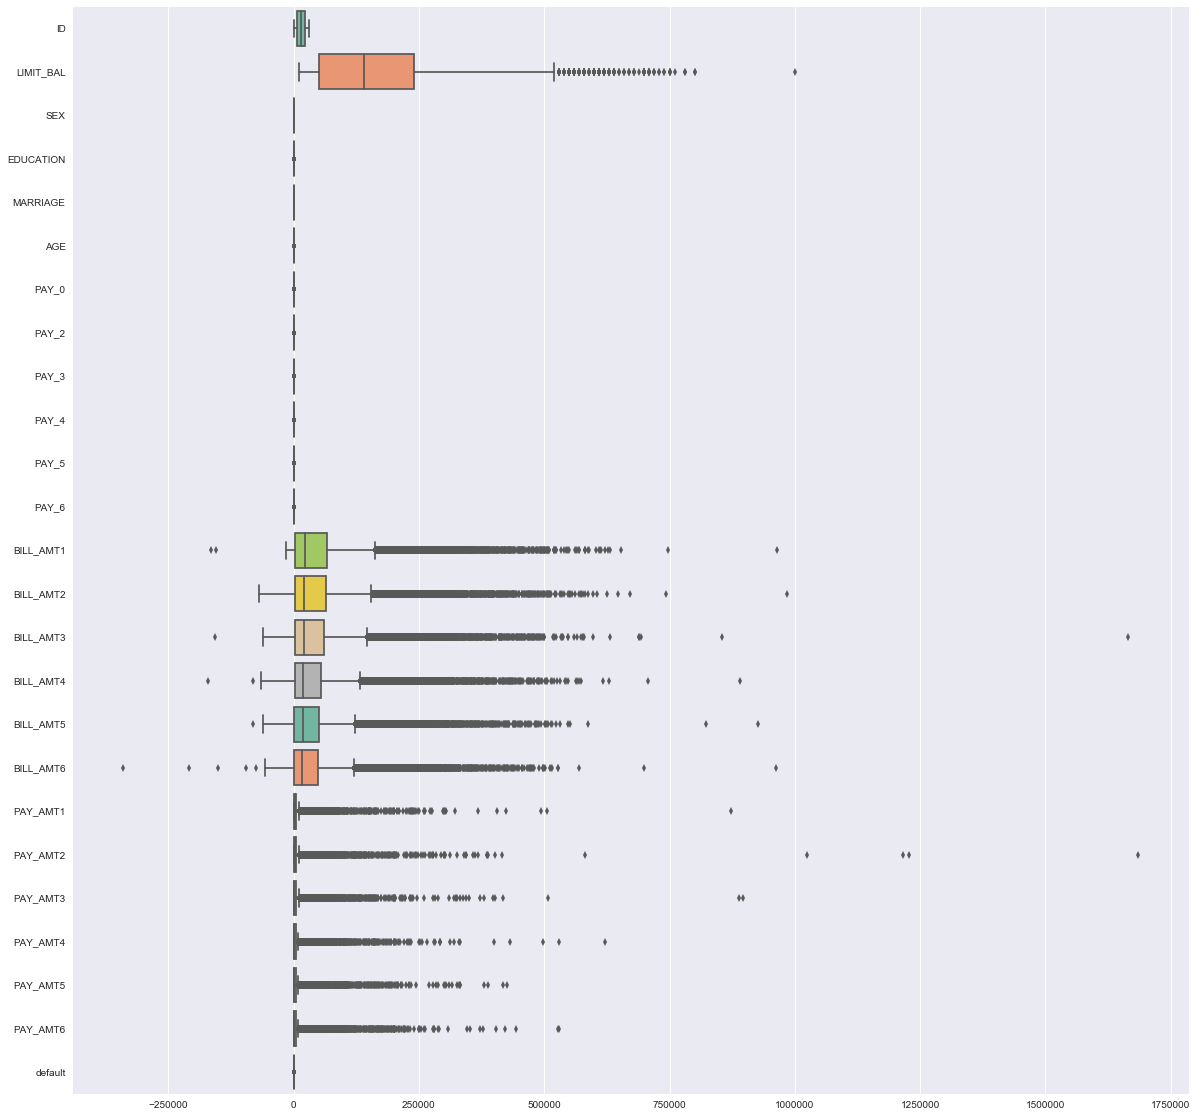

In [35]:
plt.figure(figsize=(20,20))
ax=sns.boxplot(data=dataset,orient="h",palette="Set2")

In [36]:
#Splitting the dataset
dataset_train,dataset_test = dataset.iloc[:,1:len(dataset.columns)-1],dataset.iloc[:,len(dataset.columns)-1]
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_train, dataset_test, test_size = 0.2, random_state = 0)

C:\Users\narayanreddy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [40]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[4520  183]
 [ 892  405]]


In [41]:
accuracy_score(y_test, y_pred)

0.8208333333333333

In [42]:
precision_score(y_test, y_pred)

0.68877551020408168

In [43]:
recall_score(y_test, y_pred)

0.31225905936777176

In [44]:
import statsmodels.api as sm
from scipy import stats
logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

C:\Users\narayanreddy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.447573
         Iterations 7


In [45]:
print (logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23976
Method:                           MLE   Df Model:                           23
Date:                Tue, 24 Oct 2017   Pseudo R-squ.:                  0.1555
Time:                        01:51:38   Log-Likelihood:                -10742.
converged:                       True   LL-Null:                       -12720.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9733      0.138     -7.049      0.000      -1.244      -0.703
LIMIT_BAL  -1.417e-06   1.72e-07     -8.251      0.000   -1.75e-06   -1.08e-06
SEX           -0.1517      0.035     -4.304      0.0

In [46]:
#Removing high Pvalue variables
X_trainnew=X_train.drop(['BILL_AMT2','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT3','PAY_AMT4','PAY_AMT5'],axis=1)
X_testnew=X_test.drop(['BILL_AMT2','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT3','PAY_AMT4','PAY_AMT5'],axis=1)

In [47]:
#Logestic Regression with seleted variables
classifier1 = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
classifier1.fit(X_trainnew, y_train)
y_prednew = classifier1.predict(X_testnew)

In [48]:
newcm=confusion_matrix(y_test,y_prednew)
print(newcm)

[[4523  180]
 [ 891  406]]


In [49]:
accuracy_score(y_test, y_prednew)

0.82150000000000001

In [50]:
precision_score(y_test, y_prednew)

0.69283276450511944

In [51]:
recall_score(y_test, y_prednew)

0.31303006939090205

In [52]:
logit_modelnew = sm.Logit(y_train, sm.add_constant(X_trainnew)).fit()
print (logit_modelnew.summary())

Optimization terminated successfully.
         Current function value: 0.447801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23983
Method:                           MLE   Df Model:                           16
Date:                Tue, 24 Oct 2017   Pseudo R-squ.:                  0.1551
Time:                        01:59:22   Log-Likelihood:                -10747.
converged:                       True   LL-Null:                       -12720.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9776      0.138     -7.084      0.000      -1.248      -0.707
LIMIT_BAL    -1.5e-06   1.69e

In [53]:
# Random forest method with seleted variables
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
forest.fit(X_trainnew, y_train)
y_pred2 = forest.predict(X_testnew)

In [54]:
cm1=confusion_matrix(y_test,y_pred2)
print(cm1)

[[4492  211]
 [ 815  482]]


In [55]:
accuracy_score(y_test, y_pred2)

0.82899999999999996

In [56]:
precision_score(y_test, y_pred2)

0.69552669552669555

In [57]:
recall_score(y_test, y_pred2)

0.37162683114880496

In [58]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred2)

In [59]:
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.663380925674


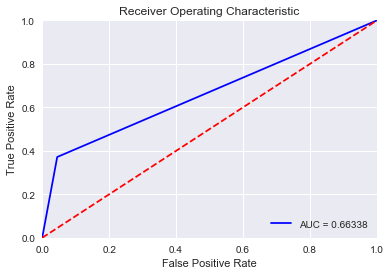

In [60]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [62]:
# Applying k-Fold Cross Validation on RF model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = forest, X = X_trainnew, y = y_train, cv = 10)
accuracies.mean()

0.81908370888316706

In [64]:
# Applying kNN(k- nearest neighbors)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_trainnew, y_train)
knn_score_train = knn.score(X_trainnew, y_train)
print("Training score: ",knn_score_train)
knn_score_test = knn.score(X_testnew, y_test)
print("Testing score: ",knn_score_test)

Training score:  0.81475
Testing score:  0.759333333333
